In [1]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [3]:
train_df = train_df.sample(frac=1, random_state=42)

In [4]:
X, y = train_df.drop('label', axis=1), train_df['label']

In [5]:
X.shape, y.shape

((27455, 784), (27455,))

In [6]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [7]:
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [8]:
X = X/255.0

In [9]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [10]:
X = tf.reshape(X, [-1, 28, 28, 1])

In [11]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [12]:
X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [13]:
X_train[0].dtype

tf.float64

In [14]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x20eaa7a2ca0>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0]))

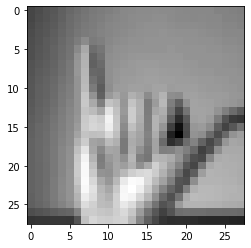

In [15]:
plt.imshow(X[0], cmap='gray'), y[2]

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
save_best_cb = keras.callbacks.ModelCheckpoint('initial-end-to-end', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [20]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.7405 - accuracy: 0.7716

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 25s 21ms/step - loss: 0.7405 - accuracy: 0.7716 - val_loss: 0.0184 - val_accuracy: 0.9988
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9977

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 16s 21ms/step - loss: 0.0113 - accuracy: 0.9977 - val_loss: 6.6632e-04 - val_accuracy: 1.0000
Epoch 3/20
781/782 [============================>.] - ETA: 0s - loss: 4.3761e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 4.3748e-04 - accuracy: 1.0000 - val_loss: 2.7369e-04 - val_accuracy: 1.0000
Epoch 4/20
781/782 [============================>.] - ETA: 0s - loss: 2.0137e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 16s 20ms/step - loss: 2.0132e-04 - accuracy: 1.0000 - val_loss: 1.4363e-04 - val_accuracy: 1.0000
Epoch 5/20
780/782 [============================>.] - ETA: 0s - loss: 9.4086e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 9.4030e-05 - accuracy: 1.0000 - val_loss: 7.0379e-05 - val_accuracy: 1.0000
Epoch 6/20
780/782 [============================>.] - ETA: 0s - loss: 5.0396e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 5.0389e-05 - accuracy: 1.0000 - val_loss: 4.1547e-05 - val_accuracy: 1.0000
Epoch 7/20
782/782 [==============================] - ETA: 0s - loss: 2.9544e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 2.9544e-05 - accuracy: 1.0000 - val_loss: 2.3519e-05 - val_accuracy: 1.0000
Epoch 8/20
779/782 [============================>.] - ETA: 0s - loss: 1.8174e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 16s 21ms/step - loss: 1.8149e-05 - accuracy: 1.0000 - val_loss: 1.5866e-05 - val_accuracy: 1.0000
Epoch 9/20
780/782 [============================>.] - ETA: 0s - loss: 1.0699e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 1.0692e-05 - accuracy: 1.0000 - val_loss: 8.8468e-06 - val_accuracy: 1.0000
Epoch 10/20
778/782 [============================>.] - ETA: 0s - loss: 6.2712e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 6.2655e-06 - accuracy: 1.0000 - val_loss: 5.9392e-06 - val_accuracy: 1.0000
Epoch 11/20
781/782 [============================>.] - ETA: 0s - loss: 3.3291e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 3.3284e-06 - accuracy: 1.0000 - val_loss: 3.0666e-06 - val_accuracy: 1.0000
Epoch 12/20
781/782 [============================>.] - ETA: 0s - loss: 2.1350e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 2.1343e-06 - accuracy: 1.0000 - val_loss: 2.1152e-06 - val_accuracy: 1.0000
Epoch 13/20
782/782 [==============================] - ETA: 0s - loss: 1.3007e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 14s 18ms/step - loss: 1.3007e-06 - accuracy: 1.0000 - val_loss: 1.5877e-06 - val_accuracy: 1.0000
Epoch 14/20
778/782 [============================>.] - ETA: 0s - loss: 7.9804e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 7.9762e-07 - accuracy: 1.0000 - val_loss: 1.1102e-06 - val_accuracy: 1.0000
Epoch 15/20
781/782 [============================>.] - ETA: 0s - loss: 5.0215e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 5.0233e-07 - accuracy: 1.0000 - val_loss: 4.9291e-07 - val_accuracy: 1.0000
Epoch 16/20
780/782 [============================>.] - ETA: 0s - loss: 3.3197e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 3.3198e-07 - accuracy: 1.0000 - val_loss: 4.1293e-07 - val_accuracy: 1.0000
Epoch 17/20
781/782 [============================>.] - ETA: 0s - loss: 2.0277e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 2.0276e-07 - accuracy: 1.0000 - val_loss: 2.3808e-07 - val_accuracy: 1.0000
Epoch 18/20
777/782 [============================>.] - ETA: 0s - loss: 1.3761e-07 - accuracy: 1.0000

INFO:tensorflow:Assets written to: initial-end-to-end\assets


INFO:tensorflow:Assets written to: initial-end-to-end\assets


782/782 [==============================] - 15s 19ms/step - loss: 1.3735e-07 - accuracy: 1.0000 - val_loss: 1.6723e-07 - val_accuracy: 1.0000
Epoch 19/20
782/782 [==============================] - 14s 17ms/step - loss: 9.8567e-08 - accuracy: 1.0000 - val_loss: 4.6305e-06 - val_accuracy: 1.0000
Epoch 20/20
782/782 [==============================] - 13s 16ms/step - loss: 0.0899 - accuracy: 0.9793 - val_loss: 3.2959e-04 - val_accuracy: 1.0000


In [22]:
history.history

{'loss': [0.7405094504356384,
  0.011254285462200642,
  0.00043748237658292055,
  0.00020131551718804985,
  9.403005242347717e-05,
  5.038879316998646e-05,
  2.954396404675208e-05,
  1.814886854845099e-05,
  1.0692021533031948e-05,
  6.265496722335229e-06,
  3.3283540687989444e-06,
  2.1343234948290046e-06,
  1.300704980167211e-06,
  7.97622817572119e-07,
  5.023313178753597e-07,
  3.3198188020833186e-07,
  2.0276041823308333e-07,
  1.3734799608755566e-07,
  9.856679383801747e-08,
  0.08989246934652328],
 'accuracy': [0.77156001329422,
  0.9977200031280518,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9792799949645996],
 'val_loss': [0.01839500479400158,
  0.0006663150852546096,
  0.0002736948081292212,
  0.0001436274469597265,
  7.037875184323639e-05,
  4.154695488978177e-05,
  2.351945840928238e-05,
  1.586629332450684e-05,
  8.846803211781662e-06,
  5.9392446019046474e-06,
  3.0666080874652835e-06,
  2.115

In [24]:
best_model = keras.models.load_model('initial-end-to-end')

In [25]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')

In [26]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [27]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [28]:
y_test = label_binarizer.transform(y_test)

In [32]:
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 1s 6ms/step - loss: 116.5061 - accuracy: 0.9034


[116.50614166259766, 0.9033742547035217]